# Data Science & Business Analytics - Task 2: Prediction using Unsupervised Machine Learning

## Prepared by: Karan Mirchandani

### Aim: To predict the number of clusters in iris dataset

## Importing all libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

## Reading the dataset

### Importing the dataset

In [4]:
iris = pd.read_csv('D:\Datasets\iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Viewing initial rows of the dataset

In [5]:
iris_df = iris
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Computing the K-value and predicting the optimum number of clusters

In [6]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Now we plot the results, which gives us the elbow curve

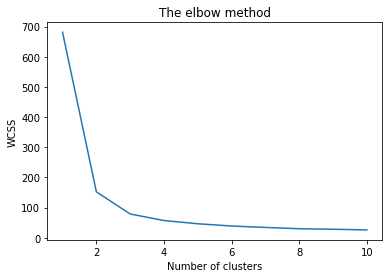

In [7]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### As we can see, there is no significant change when the number of clusters is 3. As a result, the optimum numbers of clusters for the iris dataset is 3.

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 700, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Now, we can visualize the predicted number of clusters as centroids in the iris dataset

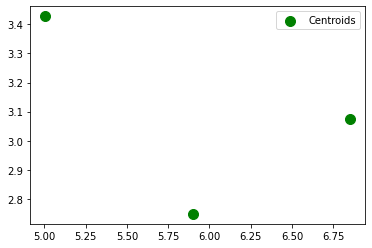

In [11]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')
plt.legend()

### All the predicted clusters are now visualized in the above plot.